### Installing Libraries

In [1]:
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

### Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Virat/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-7 Python-3.10.9 torch-2.3.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


### Base Detection

In [6]:
img = 'https://ultralytics.com/images/bus.jpg'


In [7]:
result = model(img)
print(result)

image 1/1: 1080x810 4 persons, 1 bus
Speed: 1683.7ms pre-process, 149.0ms inference, 20.0ms NMS per image at shape (1, 3, 640, 480)


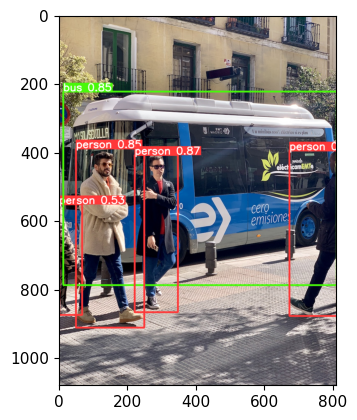

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

### Detection Real Time Testing

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('e'):
        break
cap.release()
cv2.destroyAllWindows()

### Training


In [12]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Virat\Desktop\Deep': No such file or directory
YOLOv5  2024-5-6 Python-3.10.9 torch-2.3.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias

### Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp13/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Virat/.cache\torch\hub\master.zip
YOLOv5  2024-5-8 Python-3.10.9 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [8]:
img = os.path.join('image_data', 'testing', 'Screenshot 2024-05-07 121006.png')

In [9]:
result = model(img)

In [10]:
result.print()

image 1/1: 732x1373 1 Smoking
Speed: 49.0ms pre-process, 127.0ms inference, 1.0ms NMS per image at shape (1, 3, 352, 640)


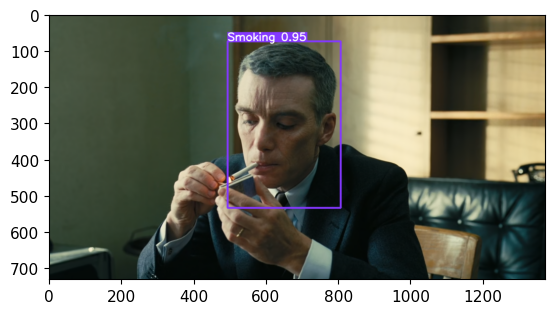

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [12]:
cap = cv2.VideoCapture('The two-year-old who smokes 40 cigarettes a day.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('e'):
        break
cap.release()
cv2.destroyAllWindows()